# MALL CUSTOMER SEGMENTATION AND PREDICTION USING KMEANS DECISION TREE RANDOMFOREST KNN-
##### HEMANTH KUMAR K#####

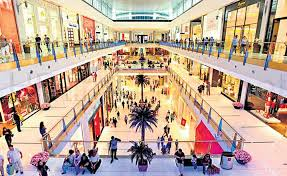

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import cufflinks as cf
import plotly.offline as pyo
%matplotlib inline
from plotly.offline import init_notebook_mode,plot,iplot
pyo.init_notebook_mode(connected=True)
cf.go_offline()


Now let's import the our Mall dataset

In [ ]:
df = pd.read_csv(r'/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print(df.head())

Reading the Dataset

In [ ]:
df.describe()

correlation is the best way to check the relationship between columns.
in this heatmap we cn see more darker the color more is correlation between them 
ie age and income score is very important features

In [ ]:
sns.heatmap(df.drop(['CustomerID'],axis=1).corr(),annot=True)

**lets draw a distplot to find the distribution**

In [ ]:
f,axes=plt.subplots(1,3,figsize=(20,20))
sns.distplot(df['Annual Income (k$)'],color='red',label="nannualincome",ax=axes[0])

sns.distplot(df['Age'],color='yellow',label="age",ax=axes[1])
sns.distplot(df['Spending Score (1-100)'],color="skyblue", label="Spending Score",ax=axes[2])

> Here, In the above Plots we can see the Distribution pattern of Annual Income ,Age and spending score , By looking at the plots,
> 
> we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.
> 
> Taking inferences about the Customers.
> 
> The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in number as compared to the Middle aged people.

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5)) #sharex=True)
sns.distplot(df['Annual Income (k$)'][df['Gender']=="Male"],color="salmon", label="Annual Income (k$)",ax=axes[0])
sns.distplot(df['Annual Income (k$)'][df['Gender']=="Female"],color="skyblue", label="Annual Income (k$)",ax=axes[0])
    
sns.distplot(df['Age'][df['Gender']=="Male"],color="salmon", label="Age",ax=axes[1])
sns.distplot(df['Age'][df['Gender']=="Female"],color="skyblue", label="Age",ax=axes[1])

sns.distplot(df['Spending Score (1-100)'][df['Gender']=="Male"],color="salmon", label="Spending Score",ax=axes[2])
sns.distplot(df['Spending Score (1-100)'][df['Gender']=="Female"],color="skyblue", label="Spending Score",ax=axes[2])

plt.show()

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 10)) #sharex=True)
sns.scatterplot(x="Age", y="Spending Score (1-100)",hue="Gender", data=df, ax=axes[0])
sns.scatterplot(x="Age", y="Annual Income (k$)",hue="Gender", data=df, ax=axes[1])

# **lets import kmeans**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
x_k=df['Annual Income (k$)'].values
y_k=df['Spending Score (1-100)'].values

x_k is annual income,
y_k is spending score 
lets zip the x_k and y_k

In [ ]:
x_k

In [ ]:
y_k

In [ ]:
x_k2=list(zip(x_k,y_k))
x_k2=np.array(x_k2)
x_k2

default of n_clusters is 8

In [ ]:
model=KMeans(n_clusters=5)
model.fit(x_k2) 
y_kmeans=model.predict(x_k2)
y_kmeans

In [ ]:
label=model.labels_
label


lets find uniqiue labels

In [ ]:
unique_labels = set(model.labels_)
unique_labels

lets draw the clusters

In [ ]:
for c in unique_labels:  
    plt.scatter(x_k2[model.labels_ == c, 0],
                x_k2[model.labels_ == c, 1],
                label='cluster{}'.format(c))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='red',label='Centroids')#to find centroids
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
#label=['Standard people','Tightwad people','Normal people', 'Careless people(TARGET)','Rich people(TARGET)']

so now we can see the clusters 

In [ ]:
plt.figure(1 , figsize = (17 , 8))
plt.scatter(x_k2[y_kmeans == 0, 0], x_k2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard people')
plt.scatter(x_k2[y_kmeans == 1, 0], x_k2[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Tightwad people')
plt.scatter(x_k2[y_kmeans == 2, 0], x_k2[y_kmeans == 2, 1], s = 100, c = 'aqua', label = 'Normal people')
plt.scatter(x_k2[y_kmeans == 3, 0], x_k2[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Careless people(TARGET)')
plt.scatter(x_k2[y_kmeans == 4, 0], x_k2[y_kmeans == 4, 1], s = 100, c = 'lightgreen', label = 'Rich people(TARGET)')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

to predict we need to make the model supervised or labeled like which will belong to which clusters lets to do it
first take the labels as target...ie y=no of unique clusters

In [ ]:
target = pd.DataFrame({'target':model.labels_})
df_new = pd.concat([df,target], axis=1, sort=False)
df_new = df_new.drop(['CustomerID'], axis=1)
df_new

lets separate taget and features

In [ ]:
x=df_new.drop(['target'],axis=1)

In [ ]:
y=df_new['target']

convert all columns to numerical data

In [ ]:
df_gender= pd.get_dummies(x['Gender'])
df_gender
x=x.drop(['Gender'],axis=1)


In [ ]:
x=pd.concat([x,df_gender],axis=1,sort=False)

In [ ]:
x

In [ ]:
y

lets split train test the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_train

In [ ]:
x_test

lets implement decision tree and random forest algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)


In [ ]:
pdt=dt.predict(x_test)#decision tree
prf=rf.predict(x_test)#random forest

to find the accuracy of the decision tree model

In [ ]:
from sklearn.metrics import accuracy_score
accuracydt=accuracy_score(y_test,pdt)*100
accuracydt

accuracy of random forest model

In [ ]:
accuracyrf=accuracy_score(y_test,prf)*100
accuracyrf

 **lets predict our data ,so that which customer belongs to which cluster**

> lets create a category for the clusters 

In [ ]:

category=['Standard people','Tightwad people','Normal people',
          'Careless people(TARGET)','Rich people(TARGET)']

In [ ]:
#USING DECISION TREE we predict
inp=np.array([[45,126,28,1,0]])
out=dt.predict(inp)

out[0]
print(category[int(out[0])])

In [ ]:
#using randomforest
inr=np.array([[45,126,28,1,0]])
outr=rf.predict(inr)
outr
print(category[int(outr[0])])

using knn algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,ypred))
scores
plt.plot(range(1,26),scores)

In [ ]:
inpk=np.array([[35,100,200,1,0]])
outk=knn.predict(inpk)
outk[0]
print(category[int(outk[0])])

refer the clusters below

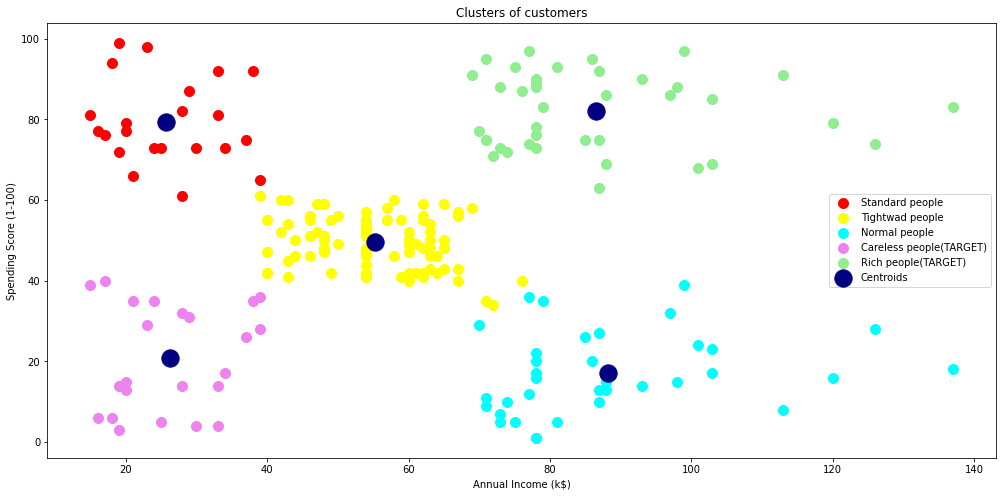